In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
df_test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [6]:
df_train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


<Axes: xlabel='y', ylabel='count'>

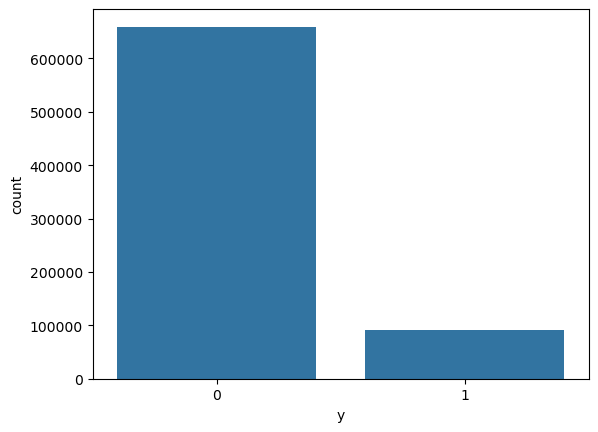

In [7]:
sns.countplot(x='y',data=df_train)

<Axes: >

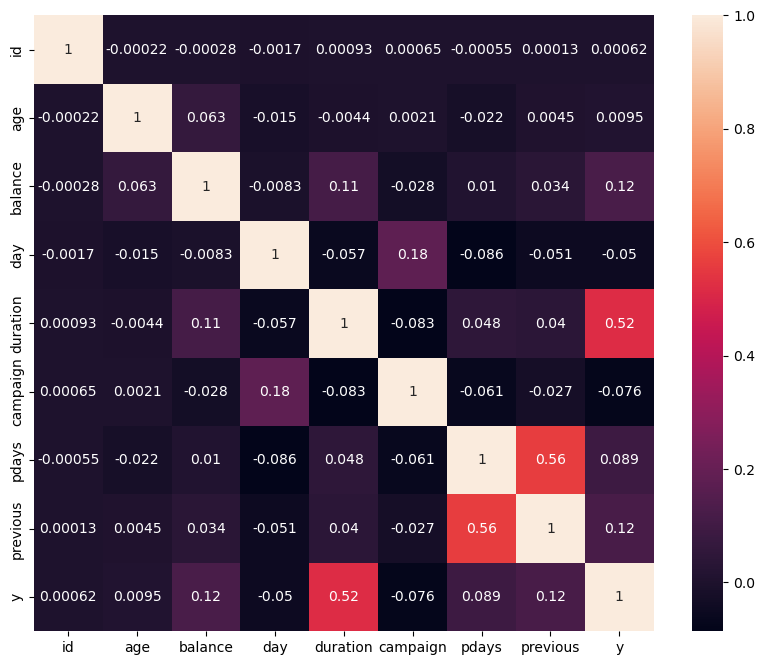

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(numeric_only=True),annot=True)

In [9]:
df_train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


<Axes: xlabel='marital', ylabel='balance'>

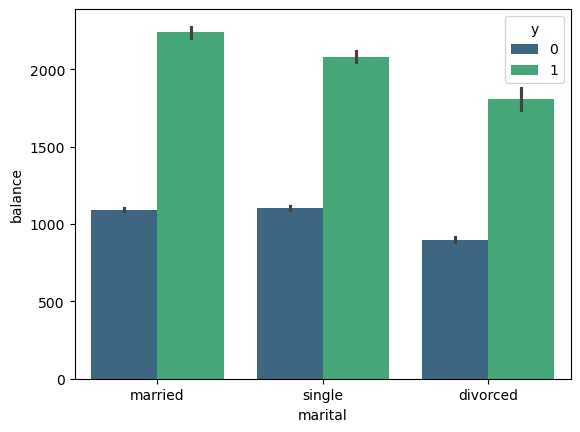

In [10]:
sns.barplot(x='marital',y='balance',data=df_train,hue='y',palette='viridis')

<Axes: xlabel='education', ylabel='balance'>

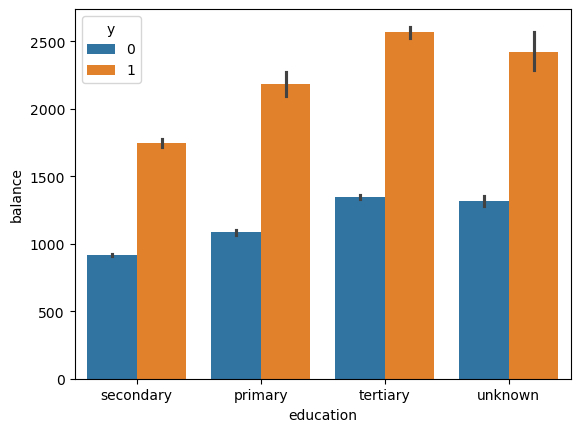

In [11]:
sns.barplot(x='education',y='balance',data=df_train,hue='y')

<Axes: xlabel='month', ylabel='balance'>

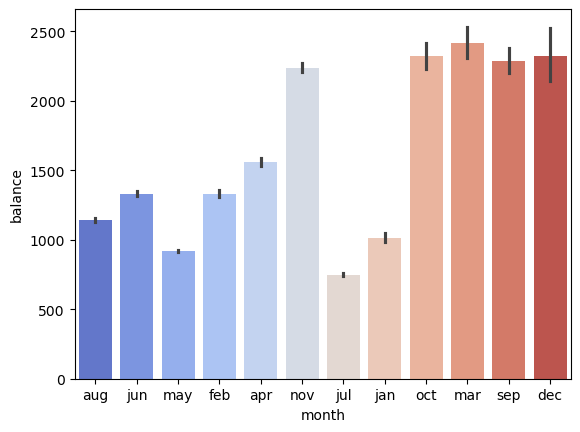

In [12]:
sns.barplot(x='month',y='balance',data=df_train,palette='coolwarm')

<Axes: xlabel='y', ylabel='count'>

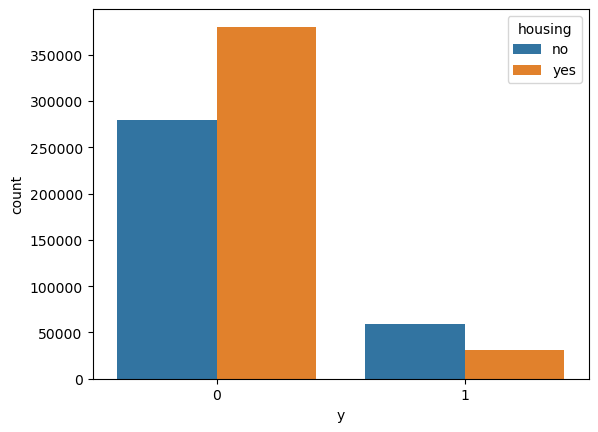

In [13]:
sns.countplot(x='y',data=df_train,hue='housing')

<Axes: xlabel='month', ylabel='count'>

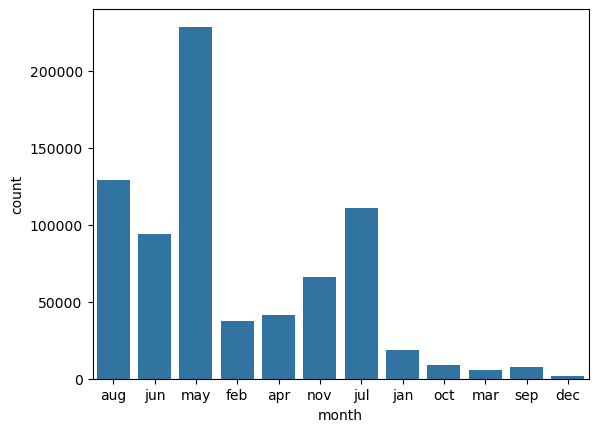

In [14]:
sns.countplot(x='month',data=df_train)

<Axes: xlabel='duration', ylabel='Count'>

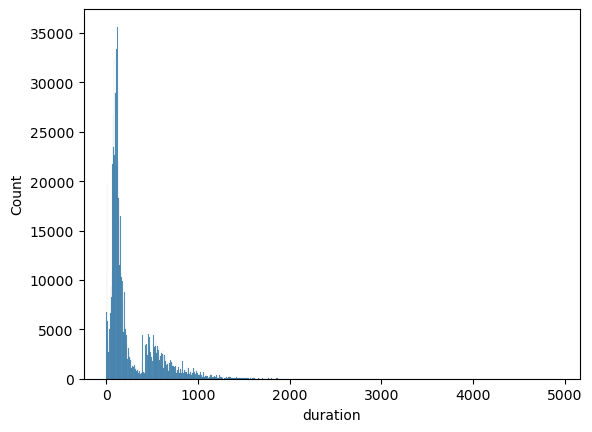

In [15]:
sns.histplot(df_train['duration'])

In [16]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [17]:
df_train['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [18]:
df_train['education'].nunique()

4

In [19]:
df_train['job'].nunique()

12

In [20]:
df_train.drop(['id','contact'],axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder

le_d=LabelEncoder()
le_h=LabelEncoder()
le_l=LabelEncoder()

df_train['default']=le_d.fit_transform(df_train['default'])
df_train['housing']=le_d.fit_transform(df_train['housing'])
df_train['loan']=le_d.fit_transform(df_train['loan'])

In [22]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,0,7,0,0,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,0,514,0,0,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,0,602,1,0,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,0,34,1,0,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,0,889,1,0,3,feb,902,1,-1,0,unknown,1


In [23]:
df = df_train.copy()

#Ordinal Encoding for education (primary < secondary < tertiary < unknown)
education_order = [["primary", "secondary", "tertiary", "unknown"]]
ord_enc = OrdinalEncoder(categories=education_order)
df["education"] = ord_enc.fit_transform(df[["education"]])

#Month Mapping
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df["month"] = df["month"].map(month_map)

#One-Hot Encoding
one_hot_cols = ["job", "marital", "poutcome"]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)

In [24]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,poutcome_other,poutcome_success,poutcome_unknown
0,42,1.0,0,7,0,0,25,8,117,3,...,0,0,1,0,0,1,0,0,0,1
1,38,1.0,0,514,0,0,18,6,185,1,...,0,0,0,0,0,1,0,0,0,1
2,36,1.0,0,602,1,0,14,5,111,2,...,0,0,0,0,0,1,0,0,0,1
3,27,1.0,0,34,1,0,28,5,10,2,...,0,1,0,0,0,0,1,0,0,1
4,26,1.0,0,889,1,0,3,2,902,1,...,0,0,1,0,0,1,0,0,0,1


In [25]:
X=df.drop('y',axis=1)
y=df['y']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.optimizers import Adam

In [30]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [31]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),   
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')      
])

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_split=0.2,epochs=50,callbacks=[early_stop])

Epoch 1/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 14s 850us/step - accuracy: 0.8981 - loss: 0.2408 - val_accuracy: 0.9118 - val_loss: 0.1965
Epoch 2/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 837us/step - accuracy: 0.9107 - loss: 0.1995 - val_accuracy: 0.9174 - val_loss: 0.1831
Epoch 3/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 12s 823us/step - accuracy: 0.9139 - loss: 0.1925 - val_accuracy: 0.9173 - val_loss: 0.1828
Epoch 4/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 12s 831us/step - accuracy: 0.9161 - loss: 0.1906 - val_accuracy: 0.9205 - val_loss: 0.1779
Epoch 5/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 835us/step - accuracy: 0.9173 - loss: 0.1880 - val_accuracy: 0.9206 - val_loss: 0.1778
Epoch 6/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 841us/step - accuracy: 0.9168 - loss: 0.1868 - val_accuracy: 0.9212 - val_loss: 0.1778
Epoch 7/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 835us/step - accuracy: 0.9191 - loss: 0.1837 - val_accuracy: 0.9214 - val_loss: 0.1750
Epoch 8/50
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 868us/s

In [76]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1696
Test Accuracy: 0.9252


In [78]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 2s 434us/step


Axes(0.125,0.11;0.62x0.77)


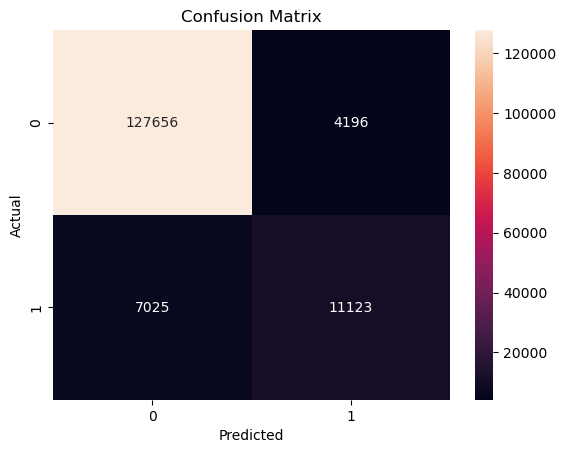

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
plt.title('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred),fmt='d',annot=True))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
print("\nClassification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96    131852
           1       0.73      0.61      0.66     18148

    accuracy                           0.93    150000
   macro avg       0.84      0.79      0.81    150000
weighted avg       0.92      0.93      0.92    150000



ROC-AUC Score: 0.9546


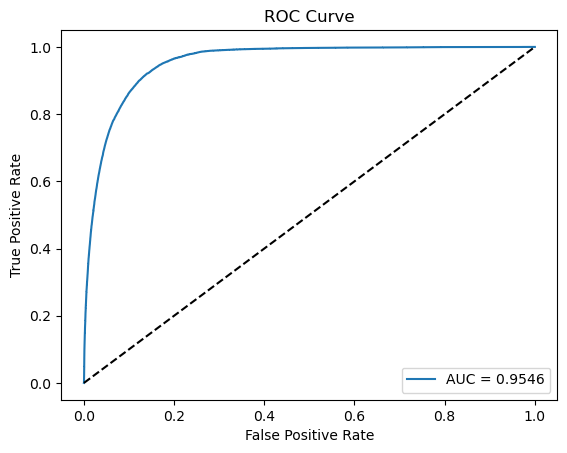

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
